In [42]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
#Data Collection And Analysis
df =pd.read_csv("/content/drive/MyDrive/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [46]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [47]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [48]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [49]:
#Data preprocessing
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb


LabelEncoder()

In [50]:
#we have 3 categorical columns smoker, sex, region
df.sex = lb.fit_transform(df.sex)
df.smoker = lb.fit_transform(df.smoker)
df.region = lb.fit_transform(df.region)

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Data Visualization And EDA**

<Axes: ylabel='charges'>

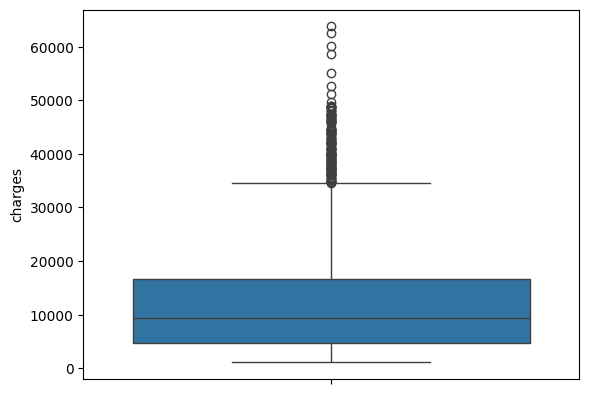

In [52]:
sns.boxplot(df["charges"])

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

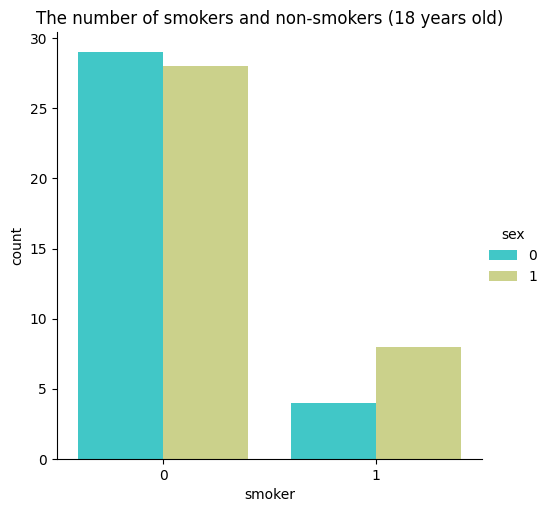

In [53]:
sns.catplot(x="smoker", kind="count", hue="sex", palette="rainbow", data=df[df.age == 18])
plt.title("The number of smokers and non-smokers (18 years old)")

<ipython-input-59-c1b338ac3056>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="charges",y="smoker",palette="rainbow",data=df[(df.age==18)])


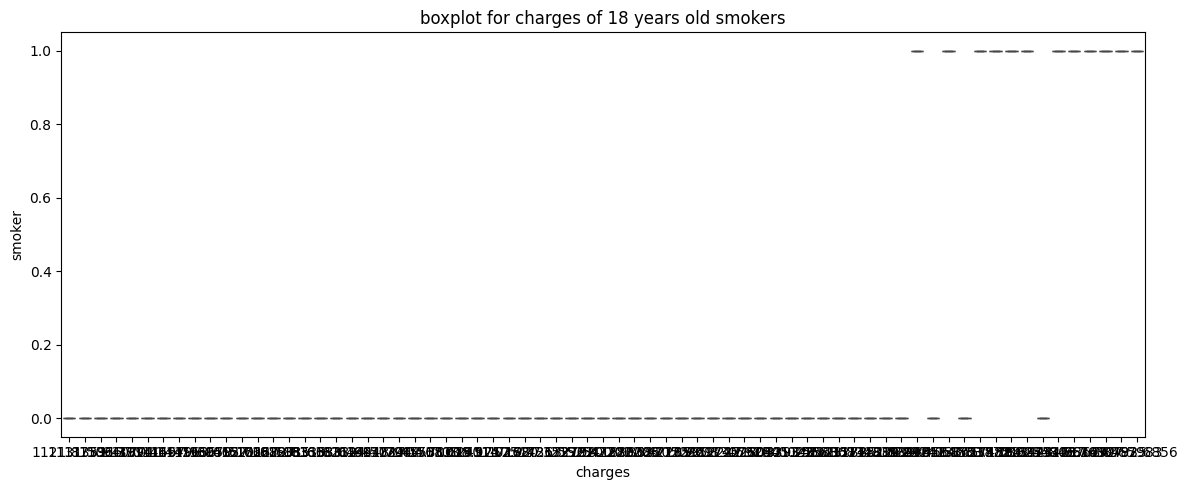

In [59]:
#so from above categorical plot,at very younge age i.e 18 years old ones does the smoking..its really affects the cost of treatment?
plt.figure(figsize=(12,5))
plt.title("boxplot for charges of 18 years old smokers")
sns.boxplot(x="charges",y="smoker",palette="rainbow",data=df[(df.age==18)])
plt.tight_layout()

<Axes: xlabel='charges', ylabel='Count'>

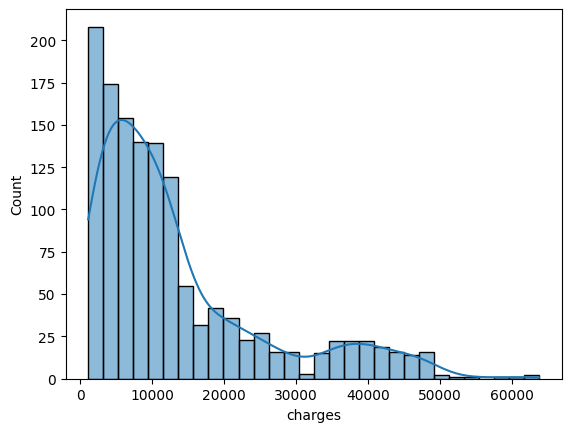

In [55]:
sns.histplot(data=df,x='charges',kde=True)

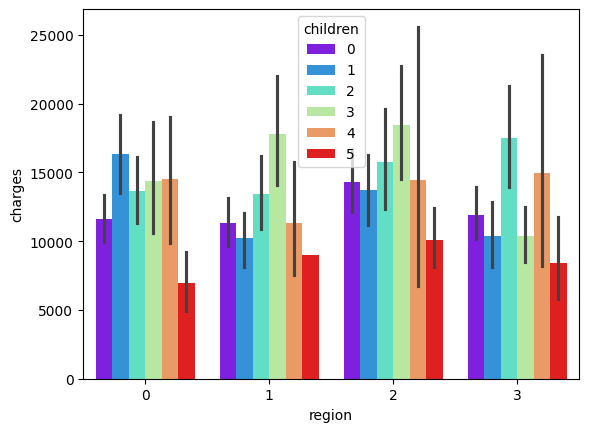

In [61]:
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='rainbow')

<Axes: >

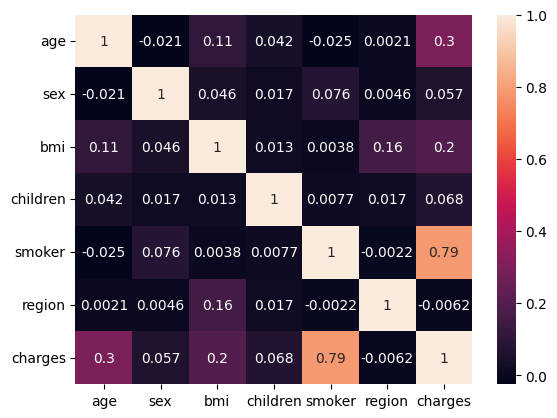

In [62]:
sns.heatmap(df.corr(),annot=True)

**Build and compare models**

In [64]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
x[:2]

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,3
1,18,1,33.77,1,0,2


In [65]:
y=df.charges

In [66]:
y[:2]

,charges
0,16884.9240
1,1725.5523


In [84]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [82]:
models= {
    "LR": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR" : SVR(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
}

for name, model in models.items():
  print(f"Training model {name} \n----------------------------------------------------------")
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f"score is {model.score(x_test,y_test)}")

  #use regression matrics
  print(f"R square Trained:{r2_score(y_train,model.predict(x_train))}")
  print(f"R square Testing:{r2_score(y_test,y_pred)}")
  print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')


Training model LR 
----------------------------------------------------------
score is 0.7475880380936374
R square Trained:0.749927856554232
R square Testing:0.7475880380936374
Mean Squared Error: 42119784.711444385
Mean Absolute Error: 4544.9014744309015
Training model KNN 
----------------------------------------------------------
score is 0.058704986883628574
R square Trained:0.42193793163325954
R square Testing:0.058704986883628574
Mean Squared Error: 157073155.34089348
Mean Absolute Error: 8763.32666600746
Training model SVR 
----------------------------------------------------------
score is -0.1745161969552611
R square Trained:-0.09635607956614756
R square Testing:-0.1745161969552611
Mean Squared Error: 195990590.07438028
Mean Absolute Error: 9223.083330218717
Training model RF 
----------------------------------------------------------
score is 0.8631211624882361
R square Trained:0.9290240442473846
R square Testing:0.8631211624882361
Mean Squared Error: 22840863.49951605
Mean A

In [ ]:
#Conclusion : as per the r2 score of above models,RandomForestRegressor gives more accuracy and then Linear regressor model